<a href="https://colab.research.google.com/github/Steve-YJ/Colab_Exercise/blob/master/Exp04_Make_Image_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 참고문헌
* 조슈아박의 나만의 이미지 데이터셋 만들기
* https://data-panic.tistory.com/13?category=745430
* Start: 20.06.26.Fri

* Chap2. 필요 라이브러리 가져오기부터 시작!

In [5]:
# 우선 Drive부터 마운트하자!

# drive mount
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

%cd drive/My\ Drive/Malimg_Exp_200611
! pwd

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Malimg_Exp_200611
/content/drive/My Drive/Malimg_Exp_200611


In [12]:
! pwd

/content/drive/My Drive/Malimg_Exp_200611


In [13]:
! ls

'04. VAE_mnist_original.ipynb'
 3ch_Image.pkl
'Exp01. pre-trained ResNet50_kNN_4K .ipynb'
'Exp02. run_GAN_Malimg.ipynb'
'Exp03. VAE to Malimg_bakup_20.06.25'
'Exp03. VAE to Malimg.ipynb'
'Exp03. VAE to Malimg.ipynb의 사본'
'Exp04. Make Image Dataset.ipynb'
 main.py
 malimg
 malimg_data2.pkl
 Origin_VAE_main.py
 pytorch-generative-model-collections
 requirements.txt
 results
 Untitled0.ipynb


In [29]:
from PIL import Image
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

import numpy as np

In [7]:
import torchvision  # torchvision package:
                    # 유명한 데이터셋, 모델 아키텍쳐 및 컴퓨터 비전을 위한 transforms 포함
from torchvision import transforms  # transform: torchvision에서 제공하는 이미지 전처리 함수
                                    # 여러개의 이미지를 Compose 내에 전처리할 내용들을 입력해 이미지처리

## 3. 데이터 전처리

<code>transform</code>

In [16]:
transform = transforms.Compose([transforms.Resize((224, 224)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.ImageFolder(root="/content/drive/My Drive/Malimg_Exp_200611/malimg",
                                            transform = transform)

In [17]:
trainset.__getitem__(18)

(tensor([[[-0.3569, -0.7882, -0.9765,  ..., -0.7098, -0.9843, -0.9922],
          [-0.8902, -0.9843, -0.9922,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          ...,
          [ 0.3882,  0.0196, -0.1216,  ...,  0.2627, -0.0196, -0.3490],
          [-0.0824, -0.1529, -0.2549,  ...,  0.0510,  0.1137, -0.0980],
          [-0.0510, -0.0824,  0.2392,  ..., -0.1059, -0.1451, -0.3490]],
 
         [[-0.3569, -0.7882, -0.9765,  ..., -0.7098, -0.9843, -0.9922],
          [-0.8902, -0.9843, -0.9922,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          ...,
          [ 0.3882,  0.0196, -0.1216,  ...,  0.2627, -0.0196, -0.3490],
          [-0.0824, -0.1529, -0.2549,  ...,  0.0510,  0.1137, -0.0980],
          [-0.0510, -0.0824,  0.2392,  ..., -0.1059, -0.1451, -0.3490]],
 
         [[-0.3569, -0.7882, -0.9765,  ..., -0.7098, -0.9843, -0.9922],
          [-0.8902, -0.9843,

In [19]:
trainset.__getitem__(18)[0].shape

torch.Size([3, 224, 224])

In [21]:
len(trainset) # 9339: 25 class, 9339 data instance

9339

In [22]:
classes = trainset.classes
classes

['Adialer.C',
 'Agent.FYI',
 'Allaple.A',
 'Allaple.L',
 'Alueron.gen!J',
 'Autorun.K',
 'C2LOP.P',
 'C2LOP.gen!g',
 'Dialplatform.B',
 'Dontovo.A',
 'Fakerean',
 'Instantaccess',
 'Lolyda.AA1',
 'Lolyda.AA2',
 'Lolyda.AA3',
 'Lolyda.AT',
 'Malex.gen!J',
 'Obfuscator.AD',
 'Rbot!gen',
 'Skintrim.N',
 'Swizzor.gen!E',
 'Swizzor.gen!I',
 'VB.AT',
 'Wintrim.BX',
 'Yuner.A']

## 4. DataLoader를 통해 데이터 올리기

In [24]:
trainloader = DataLoader(trainset,
                         batch_size=16,
                         shuffle=False)

In [25]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(labels)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


## 5. 이미지 데이터 시각화

In [26]:
def imshow(img):
    img = img / 2 + 0.5  # unnomalize
    np_img = img.numpy()
    # plt.imshow(np_img)
    plt.imshow(np.transpose(np_img, (1, 2, 0)))

    print(np_img.shape)
    print((np.transpose(np_img, (1, 2, 0))).shape)

torch.Size([16, 3, 224, 224])
(3, 906, 906)
(906, 906, 3)
torch.Size([16, 3, 224, 224])
torch.Size([3, 454, 1810])
Adialer.C Adialer.C Adialer.C Adialer.C Adialer.C Adialer.C Adialer.C Adialer.C Adialer.C Adialer.C Adialer.C Adialer.C Adialer.C Adialer.C Adialer.C Adialer.C 


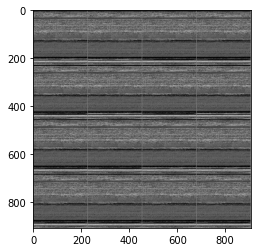

In [31]:
print(images.shape)
imshow(torchvision.utils.make_grid(images, nrow=4))
print(images.shape)
print((torchvision.utils.make_grid(images)).shape)
print("".join("%5s "%classes[labels[j]] for j in range(16)))

## Gray Scale Image로 변환하기
* Reference: https://discuss.pytorch.org/t/convert-rgb-to-gray/49024/3
* Start: 20.06.26.fri


In [32]:
# 위의 파이프라인대로 한 번 만들어보자@@

## 01. Drive Mount

In [1]:
# 우선 Drive부터 마운트하자!

# drive mount
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

%cd drive/My\ Drive/Malimg_Exp_200611
! pwd

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Malimg_Exp_200611
/content/drive/My Drive/Malimg_Exp_200611


## 02. Library Import

In [2]:
from PIL import Image
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

import numpy as np

In [3]:
import torchvision
from torchvision import transforms 

## 03. 데이터 전처리
* feat(<code>transforms</code>)

In [5]:
transforms = transforms.Compose([
                                transforms.Resize((224, 224)),
                                transforms.Grayscale(num_output_channels=1),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.5], std=[0.5])])
# trainset = torchvision.datasets.ImageFolder(root="/content/drive/My Drive/Malimg_Exp_200611/malimg",
#                                             transforms = transform)
trainset = torchvision.datasets.ImageFolder(root='./malimg',
                                            transform=transforms)

In [11]:
classes = trainset.classes
classes

['Adialer.C',
 'Agent.FYI',
 'Allaple.A',
 'Allaple.L',
 'Alueron.gen!J',
 'Autorun.K',
 'C2LOP.P',
 'C2LOP.gen!g',
 'Dialplatform.B',
 'Dontovo.A',
 'Fakerean',
 'Instantaccess',
 'Lolyda.AA1',
 'Lolyda.AA2',
 'Lolyda.AA3',
 'Lolyda.AT',
 'Malex.gen!J',
 'Obfuscator.AD',
 'Rbot!gen',
 'Skintrim.N',
 'Swizzor.gen!E',
 'Swizzor.gen!I',
 'VB.AT',
 'Wintrim.BX',
 'Yuner.A']

## 04. 데이터 옮기기
* DataLoader
* shuffle = True

In [6]:
trainloader = DataLoader(trainset,
                         batch_size=16,
                         shuffle=True)

In [7]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(labels)

tensor([ 2,  2,  9, 22,  3, 10,  3,  2, 14,  4, 22,  2,  2, 24,  2,  3])


## 05. 이미지 데이터 시각화


In [8]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    np_img = img.numpy()

    plt.imshow(np.transpose(np_img, (1, 2, 0)))

    print(np_img.shape)  # np_img shape
    print((np.transpose(np_img, (1, 2, 0))).shape)  # transposed shape 

torch.Size([16, 1, 224, 224])
(3, 906, 906)
(906, 906, 3)
torch.Size([16, 1, 224, 224])
torch.Size([3, 454, 1810])
Allaple.A Allaple.A Dontovo.A VB.AT Allaple.L Fakerean Allaple.L Allaple.A Lolyda.AA3 Alueron.gen!J VB.AT Allaple.A Allaple.A Yuner.A Allaple.A Allaple.L 


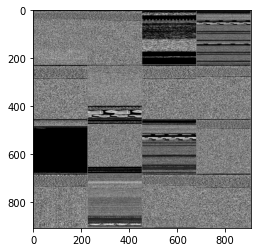

In [12]:
print(images.shape)
imshow(torchvision.utils.make_grid(images, nrow=4))
print(images.shape)
print((torchvision.utils.make_grid(images)).shape)
print("".join("%5s "%classes[labels[j]] for j in range(16)))